In [ ]:
# class_weights: [0.13859, 0.071339, 0.089489, 0.11388, 0.11799, 0.2659, 0.20282]

# Jet Data

In [ ]:
from glob import glob
import os

train_paths = glob('jetdataset/datasets/train/images/*')
val_paths = glob('jetdataset/datasets/val/images/*')
print(len(train_paths), len(val_paths))

14448 4898


In [ ]:
import cv2
from tqdm import tqdm

for path in tqdm(train_paths):
  image = cv2.imread(path)
  colorimage = cv2.applyColorMap(image, cv2.COLORMAP_JET)
  cv2.imwrite(path, colorimage)

for path in tqdm(val_paths):
  image = cv2.imread(path)
  colorimage = cv2.applyColorMap(image, cv2.COLORMAP_JET)
  cv2.imwrite(path, colorimage)

100%|██████████| 4898/4898 [09:41<00:00,  8.42it/s]


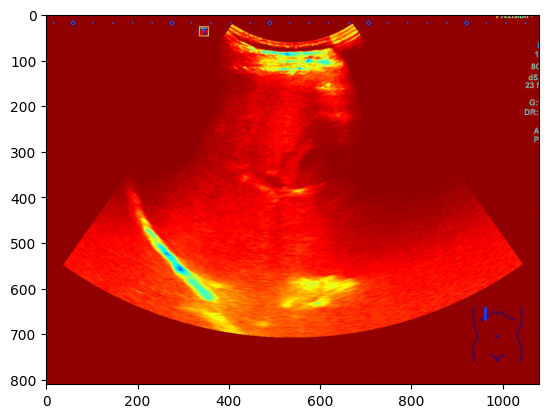

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread(train_paths[1])
plt.imshow(img)

# Import Libary

In [ ]:
import torch

print(f'Setup complete. Using torch {torch.__version__}')
print(f"{torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'}")

Setup complete. Using torch 2.3.0+cu121
NVIDIA A100-SXM4-40GB


In [ ]:
import os

HOME = os.getcwd()
print(HOME)

/lustrefs/disk/project/lt900209-ai24xi


In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.1.34 🚀 Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
Setup complete ✅ (64 CPUs, 502.7 GB RAM, 0.2/251.4 GB disk)


# Read Datasets from Kaggle

In [ ]:
!pwd

/project/lt900209-ai24xi


In [ ]:
# !unzip "/project/lt900104-ai24e4/Boss/Liver-Yolo/data-liver.zip" -d "/project/lt900104-ai24e4/Junior/datasets"


  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/120342.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/88304.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/19101.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/4142.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/121268.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/145886.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/68996.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/3776.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/7050.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/242.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/27155.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/56026.jpg  
  inflating: /project/lt900104-ai24e4/Junior/datasets/val/images/43179.jpg  


# Modeling

## Train Model

In [ ]:
# cd /lustrefs/disk/project/lt900104-ai24e4/Boss/Liver-Yolo

/lustrefs/disk/project/lt900104-ai24e4/Boss/Liver-Yolo


/home/ai4143/.conda/envs/myenvl/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
!pwd

/project/lt900209-ai24xi


In [ ]:
!ls

datasets			notebook.sh	  Yolov10.ipynb
main.ipynb			runs		  yolov10s.pt
Manage_Datasets_for_Yolo.ipynb	slurm-871707.out  yolov10x.pt


In [ ]:
!yolo task=detect mode=train epochs=70 batch=32 plots=True model=yolov10x.pt data=platedataset/data-liver1.yaml seed=42

Ultralytics YOLOv8.1.34 🚀 Python-3.10.14 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
engine/trainer: task=detect, mode=train, model=yolov10x.pt, data=platedataset/data-liver1.yaml, epochs=70, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [ ]:
!pwd

/project/lt900209-ai24xi


In [ ]:
from ultralytics import YOLOv10

yolo = YOLOv10('runs/detect/train3/weights/best.pt')
yolo

YOLOv10(
  (model): YOLOv10DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=Tru

In [ ]:
import cv2
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

root = 'platedataset/'
imgtest = np.array(glob(root + 'test2/test2/*.jpg'))
out = yolo(cv2.imread(imgtest[0]))


0: 448x640 2 4s, 1 กรุงเทพมหานคร, 11.3ms
Speed: 1.0ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


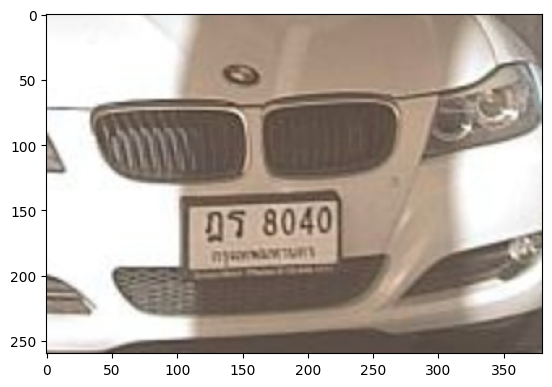

In [ ]:
plt.imshow(out[0].orig_img)

In [ ]:
out

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'ก', 11: 'ข', 12: 'ฃ', 13: 'ค', 14: 'ฅ', 15: 'ฆ', 16: 'ง', 17: 'จ', 18: 'ฉ', 19: 'ช', 20: 'ซ', 21: 'ฌ', 22: 'ญ', 23: 'ฎ', 24: 'ฏ', 25: 'ฐ', 26: 'ฑ', 27: 'ฒ', 28: 'ณ', 29: 'ด', 30: 'ต', 31: 'ถ', 32: 'ท', 33: 'ธ', 34: 'น', 35: 'บ', 36: 'ป', 37: 'ผ', 38: 'ฝ', 39: 'พ', 40: 'ฟ', 41: 'ภ', 42: 'ม', 43: 'ย', 44: 'ร', 45: 'ล', 46: 'ว', 47: 'ศ', 48: 'ษ', 49: 'ส', 50: 'ห', 51: 'ฬ', 52: 'อ', 53: 'ฮ', 54: 'กรุงเทพมหานคร', 55: 'กระบี่', 56: 'กาญจนบุรี', 57: 'กาฬสินธุ์', 58: 'กำแพงเพชร', 59: 'ขอนแก่น', 60: 'จันทบุรี', 61: 'ฉะเชิงเทรา', 62: 'ชลบุรี', 63: 'ชัยนาท', 64: 'ชัยภูมิ', 65: 'ชุมพร', 66: 'เชียงราย', 67: 'เชียงใหม่', 68: 'ตรัง', 69: 'ตราด', 70: 'ตาก', 71: 'นครนายก', 72: 'นครปฐม', 73: 'นครพนม', 74: 'นครราชสีมา', 75: 'นครศรีธรรมราช', 76: 'นครสวรรค์', 77: 'นนทบุรี', 78

In [ ]:
out[0].boxes.cls

tensor([54.,  4.,  4.], device='cuda:0')